In [ ]:
# Cloning shrinkai
!git clone https://github.com/nikshrimali/shrinkai

Cloning into 'shrinkai'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 175 (delta 93), reused 117 (delta 35), pack-reused 0
Receiving objects: 100% (175/175), 244.18 KiB | 10.62 MiB/s, done.
Resolving deltas: 100% (93/93), done.


In [ ]:
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install torch_lr_finder
!pip install torchviz

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-0bpdi1cy
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-0bpdi1cy
     |████████████████████████████████| 952kB 5.1MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=70462 sha256=5227ae33237cd25077f0b4385d4bc3fc80d61145c7d9c0bbbedacb06a18b0132
  Stored in directory: /tmp/pip-ephem-wheel-cache-nwkvruug/wheels/6f/77/82/86baf8aeda64a6de0f890cd0f2fb31acaf5545cc9c99ad21ba
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
     |████████████████████████████████| 51kB 3.4MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=aa

# Download the Dataset


In [ ]:
from shrinkai.utils.run import *

# Config File

In [ ]:

%%writefile assignment12.yml
name: ImageNet
save_dir: saved/
seed: 1
target_device: 0

model:
    type: TinyImageNetS12Model
    args: {}

modelpath:
    type: PathModel
    args: savedmodel.h5    
      

train_data_loader:
    type: TrainDataLoader
    args:
        batch_size: 256
        num_workers: 4
        shuffle: True

test_data_loader:
    type: TestDataLoader
    args:
        batch_size: 256
        num_workers: 4
        shuffle: False

criterion: cross_entropy_loss
    

optimizer:
    type: SGD
    args:
        lr: 0.01
        momentum: 0.95
        weight_decay: 0.000003


range_test:
    type: lr_finder
    args:
        start_lr: 0.00001
        end_lr: 10
        num_iter: 100
        step_mode: 'linear'

epochs: 50
best_lr: 0.808

Writing assignment12.yml


In [ ]:
config = load_config('assignment12.yml')

In [ ]:
from shrinkai.data_process.albumentation import resnet_train_alb, resent_test_alb
shrink = Shrink(config)
shrink.seed_everything(1)

Extracting ../tiny-imagenet-200.zip to ..


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

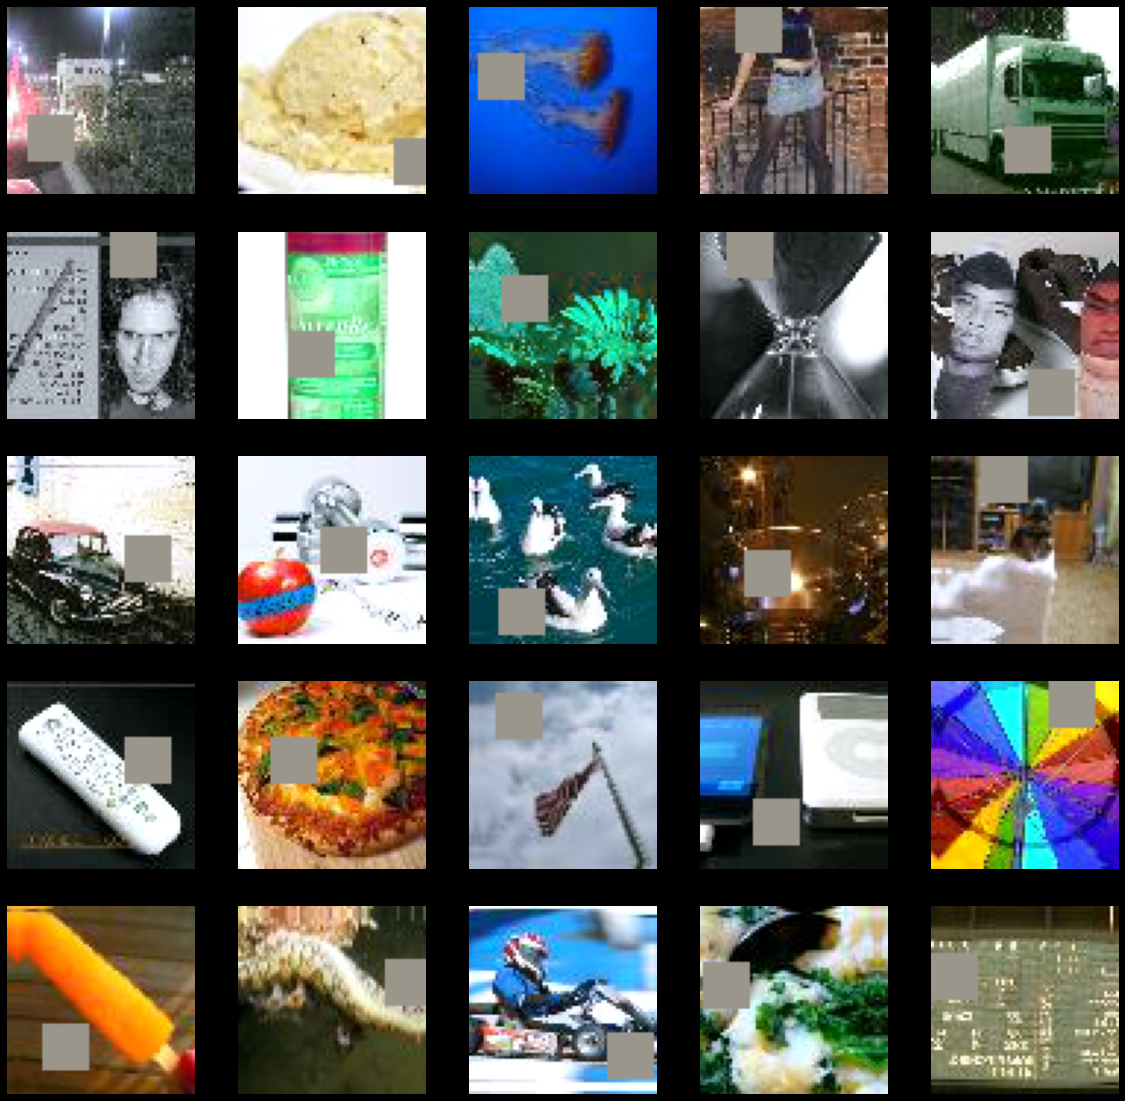

In [ ]:
shrink.load_imagenet_data(resnet_train_alb, resent_test_alb)
shrink.show_data()

In [ ]:
model = shrink.get_model(train=False)
summary(model, input_size=(3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:
shrink.get_model(train=True)

  0%|          | 0/391 [00:00<?, ?it/s]

Starting Training for 50 Epochs
EPOCHS : 0 Learning Rate: 0.08079999999999998


Loss=4.471212387084961 Batch_id=390 Accuracy=5.18: 100%|██████████| 391/391 [07:04<00:00,  1.08s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0173, Accuracy: 849/10000 (8.49%)

EPOCHS : 1 Learning Rate: 0.15031015838065775


Loss=3.8214402198791504 Batch_id=390 Accuracy=12.30: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0151, Accuracy: 1622/10000 (16.22%)

EPOCHS : 2 Learning Rate: 0.33226383419312516


Loss=3.426121950149536 Batch_id=390 Accuracy=20.18: 100%|██████████| 391/391 [07:29<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0139, Accuracy: 2146/10000 (21.46%)

EPOCHS : 3 Learning Rate: 0.5570921120156891


Loss=2.9606776237487793 Batch_id=390 Accuracy=27.39: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0126, Accuracy: 2857/10000 (28.57%)

EPOCHS : 4 Learning Rate: 0.7388332250722391


Loss=3.013322353363037 Batch_id=390 Accuracy=33.53: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 3490/10000 (34.90%)

EPOCHS : 5 Learning Rate: 0.8079999936245952


Loss=2.6592307090759277 Batch_id=390 Accuracy=38.72: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0102, Accuracy: 3968/10000 (39.68%)

EPOCHS : 6 Learning Rate: 0.8070207296643488


Loss=2.087705135345459 Batch_id=390 Accuracy=43.11: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0097, Accuracy: 4231/10000 (42.31%)

EPOCHS : 7 Learning Rate: 0.8040976716945804


Loss=1.8489830493927002 Batch_id=390 Accuracy=46.59: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 4389/10000 (43.89%)

EPOCHS : 8 Learning Rate: 0.799245060559894


Loss=2.0735936164855957 Batch_id=390 Accuracy=50.06: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 4621/10000 (46.21%)

EPOCHS : 9 Learning Rate: 0.7924865376939547


Loss=2.050083637237549 Batch_id=390 Accuracy=52.90: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 4799/10000 (47.99%)

EPOCHS : 10 Learning Rate: 0.7838550299408016


Loss=1.6586472988128662 Batch_id=390 Accuracy=55.50: 100%|██████████| 391/391 [07:29<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 5036/10000 (50.36%)

EPOCHS : 11 Learning Rate: 0.7733925891385715


Loss=1.9282147884368896 Batch_id=390 Accuracy=58.17: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 4724/10000 (47.24%)

EPOCHS : 12 Learning Rate: 0.7611501872471721


Loss=1.605695366859436 Batch_id=390 Accuracy=60.67: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 5018/10000 (50.18%)

EPOCHS : 13 Learning Rate: 0.7471874680180164


Loss=1.3281463384628296 Batch_id=390 Accuracy=62.95: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 5031/10000 (50.31%)

EPOCHS : 14 Learning Rate: 0.7315724564156612


Loss=1.4693965911865234 Batch_id=390 Accuracy=65.11: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 5130/10000 (51.30%)

EPOCHS : 15 Learning Rate: 0.7143812272070177


Loss=1.1745771169662476 Batch_id=390 Accuracy=66.97: 100%|██████████| 391/391 [07:29<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 5278/10000 (52.78%)

EPOCHS : 16 Learning Rate: 0.6956975343327341


Loss=1.3134369850158691 Batch_id=390 Accuracy=69.20: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 5312/10000 (53.12%)

EPOCHS : 17 Learning Rate: 0.6756124028664157


Loss=1.0078909397125244 Batch_id=390 Accuracy=71.11: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 5396/10000 (53.96%)

EPOCHS : 18 Learning Rate: 0.654223685549616


Loss=1.0590317249298096 Batch_id=390 Accuracy=73.08: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 5338/10000 (53.38%)

EPOCHS : 19 Learning Rate: 0.631635586063116


Loss=0.8600338697433472 Batch_id=390 Accuracy=75.20: 100%|██████████| 391/391 [07:31<00:00,  1.16s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 5337/10000 (53.37%)

EPOCHS : 20 Learning Rate: 0.6079581513570662


Loss=0.7930294275283813 Batch_id=390 Accuracy=76.92: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0092, Accuracy: 5298/10000 (52.98%)

EPOCHS : 21 Learning Rate: 0.5833067355133071


Loss=0.9334136247634888 Batch_id=390 Accuracy=78.44: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 5325/10000 (53.25%)

EPOCHS : 22 Learning Rate: 0.5578014377518778


Loss=0.5049999952316284 Batch_id=390 Accuracy=79.90: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 5366/10000 (53.66%)

EPOCHS : 23 Learning Rate: 0.5315665173196886


Loss=0.571189820766449 Batch_id=390 Accuracy=81.88: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 5417/10000 (54.17%)

EPOCHS : 24 Learning Rate: 0.5047297881119599


Loss=0.6847389340400696 Batch_id=390 Accuracy=83.08: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 5443/10000 (54.43%)

EPOCHS : 25 Learning Rate: 0.4774219959757732


Loss=0.6617940664291382 Batch_id=390 Accuracy=84.63: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 5452/10000 (54.52%)

EPOCHS : 26 Learning Rate: 0.44977618172944633


Loss=0.6314728260040283 Batch_id=390 Accuracy=86.08: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0100, Accuracy: 5525/10000 (55.25%)

EPOCHS : 27 Learning Rate: 0.42192703300104006


Loss=0.5438582301139832 Batch_id=390 Accuracy=87.35: 100%|██████████| 391/391 [07:29<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 5471/10000 (54.71%)

EPOCHS : 28 Learning Rate: 0.3940102280437723


Loss=0.4646162986755371 Batch_id=390 Accuracy=88.63: 100%|██████████| 391/391 [07:30<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 5485/10000 (54.85%)

EPOCHS : 29 Learning Rate: 0.3661617747252075


Loss=0.4696308672428131 Batch_id=390 Accuracy=89.84: 100%|██████████| 391/391 [07:29<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0107, Accuracy: 5537/10000 (55.37%)

EPOCHS : 30 Learning Rate: 0.3385173479105972


Loss=0.44282031059265137 Batch_id=390 Accuracy=90.49: 100%|██████████| 391/391 [07:31<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 5515/10000 (55.15%)

EPOCHS : 31 Learning Rate: 0.31121162846857375


Loss=0.36414748430252075 Batch_id=390 Accuracy=91.72: 100%|██████████| 391/391 [07:29<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 5523/10000 (55.23%)

EPOCHS : 32 Learning Rate: 0.28437764711949753


Loss=0.19260278344154358 Batch_id=390 Accuracy=92.63: 100%|██████████| 391/391 [07:31<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 5604/10000 (56.04%)

EPOCHS : 33 Learning Rate: 0.2581461363231589


Loss=0.1435505449771881 Batch_id=390 Accuracy=93.44: 100%|██████████| 391/391 [07:29<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 5630/10000 (56.30%)

EPOCHS : 34 Learning Rate: 0.2326448933633754


Loss=0.2522772550582886 Batch_id=390 Accuracy=94.09: 100%|██████████| 391/391 [07:29<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 5620/10000 (56.20%)

EPOCHS : 35 Learning Rate: 0.207998157732471


Loss=0.13187702000141144 Batch_id=390 Accuracy=94.76: 100%|██████████| 391/391 [07:28<00:00,  1.15s/it]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 5679/10000 (56.79%)

EPOCHS : 36 Learning Rate: 0.1843260058489583


Loss=0.1289389729499817 Batch_id=64 Accuracy=95.59:  17%|█▋        | 65/391 [01:15<06:12,  1.14s/it]

In [ ]:
# shrink.findbestlr()

In [ ]:
shrink = Shrink(config)
shrink.seed_everything(1)

# from shrinkai.data_process.albumentation import cifar_alb11, cifar_alb_testdata
# trainloader, testloader = shrink.load_data(cifar_alb11,cifar_alb_testdata)
# shrink.get_model(train=False)

In [ ]:

# images = np.concatenate((train_data, test_data), axis=0)
# labels = np.concatenate((train_labels, test_labels), axis=0)

In [ ]:
# def cifar_alb_testdata():
#     mean = (0.5)
#     std = (0.5)
#     test_transform = [
#         A.Normalize(mean=mean, std=std),
#         ToTensor()]
#     transforms_result = A.Compose(test_transform)
#     return lambda img:transforms_result(image=np.array(img))["image"]

In [ ]:
# from torch.utils.data import Dataset

# def split(images, labels, n_split):
#   train_length = round(len(images)*(n_split/100))
#   train_images = images[:train_length]
#   train_labels = labels[:train_length]
#   test_images = images[train_length:]
#   test_labels = labels[train_length:]
#   print(f'Length of training set - {len(train_images)}, {len(test_images)}')
#   return train_images, train_labels, test_images, test_labels

# class ImageNet(Dataset):
#     def __init__(self, images, labels, transforms=None):
#         self.images = images
#         self.labels = labels
#         self.transforms = transforms
#         print('bf', self.images.shape, self.labels.shape)

#     def __len__(self):
#         return len(self.images)

#     def __getitem__(self, idx):
#         print('af', self.images.shape, self.labels.shape)
#         print('idx',idx)
#         self.images = self.images[idx]
#         self.labels = self.labels[idx]
#         print('af1', self.images.shape, self.labels.shape)
#         # sample = {'image': self.images, 'landmarks': self.landmarks}

#         if self.transforms:
#             self.images = self.transforms(self.images)
#             # return sample
    
#         return self.images,self.labels

In [ ]:
# train_images, train_labels, test_images, test_labels = split(train_data, train_labels, 70)


In [ ]:
# dataset = ImageNet(train_images, train_labels, cifar_alb_testdata())

In [ ]:
# trainloader = torch.utils.data.DataLoader(dataset, **config['train_data_loader']['args'])

In [ ]:
# from PIL import Image

# import os
# import os.path
# import hashlib
# import gzip
# import errno
# import tarfile
# import zipfile
# import glob

# class TinyImageNet(Dataset):
#     url = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
#     filename = 'tiny-imagenet-200.zip'
#     dataset_folder_name = 'tiny-imagenet-200'

#     EXTENSION = 'JPEG'
#     NUM_IMAGES_PER_CLASS = 500
#     CLASS_LIST_FILE = 'wnids.txt'
#     VAL_ANNOTATION_FILE = 'val_annotations.txt'

#     def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
#         self.root = root
#         self.transform = transform
#         self.target_transform = target_transform

#         if download and (not os.path.isdir(os.path.join(self.root, self.dataset_folder_name))):
#             self.download()

#         self.split_dir = 'train' if train else 'val'
#         self.split_dir = os.path.join(
#             self.root, self.dataset_folder_name, self.split_dir)
#         self.image_paths = sorted(glob.iglob(os.path.join(
#             self.split_dir, '**', '*.%s' % self.EXTENSION), recursive=True))

#         self.target = []
#         self.labels = {}

#         # build class label - number mapping
#         with open(os.path.join(self.root, self.dataset_folder_name, self.CLASS_LIST_FILE), 'r') as fp:
#             self.label_texts = sorted([text.strip()
#                                        for text in fp.readlines()])
#         self.label_text_to_number = {
#             text: i for i, text in enumerate(self.label_texts)}

#         # build labels for NUM_IMAGES_PER_CLASS images
#         if train:
#             for label_text, i in self.label_text_to_number.items():
#                 for cnt in range(self.NUM_IMAGES_PER_CLASS):
#                     self.labels[f'{label_text}_{cnt}.{self.EXTENSION}'] = i

#         # build the validation dataset
#         else:
#             with open(os.path.join(self.split_dir, self.VAL_ANNOTATION_FILE), 'r') as fp:
#                 for line in fp.readlines():
#                     terms = line.split('\t')
#                     file_name, label_text = terms[0], terms[1]
#                     self.labels[file_name] = self.label_text_to_number[label_text]

#         self.target = [self.labels[os.path.basename(
#             filename)] for filename in self.image_paths]

#     def download(self):
#         download_and_extract_archive(
#             self.url, self.root, filename=self.filename)

#     def __getitem__(self, index):
#         filepath = self.image_paths[index]
#         img = Image.open(filepath)
#         img = img.convert("RGB")
#         target = self.target[index]

#         if self.transform is not None:
#             img = self.transform(img)

#         if self.target_transform is not None:
#             target = self.target_transform(target)

#         return img, target

#     def __len__(self):
#         return len(self.image_paths)

In [ ]:
# train_set = TinyImageNet(
#     'IMagenet',
#     train=True,
#     download=False,
#     transform=cifar_alb11()
# )

# train_loader = DataLoader(train_set, **config['train_data_loader']['args']) # DataLoader(self.test_set, **self.init_kwargs)


In [ ]:
# images, labels = next(iter(train_loader))

In [ ]:
# images.shape

In [ ]:
# shrink.get_model(train=False)

In [ ]:

# from torch.data.uti